**CANADIAN SOCIETY FOR MECHANICAL ENGINEERING INTERNATIONAL CONGRESS**

**June 5 - 8, 2022, University of Alberta, Edmonton, Canada**


# L01- Neural Network with TensorFlow 2.x

- This notebook was prepared for Machine Learning workshop
- The notebook and examples are developed by **Armin Norouzi**



Table of Contents:

- Neural Network Regression with TensorFlow
- Neural Network Regression with TensorFlow for Dynamics Modeling
- Recurent Neural Network with TensorFlow
- Importing network in Matlab to design MPC controller
- Using Matlab Deep learning toolbox to develop deep learning model



## Neural Network Regression with TensorFlow

### Typical architecture of a regresison neural network

The word *typical* is on purpose! Because there are many different ways (actually, there's almost an infinite number of ways) to write neural networks.

But the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputing some kind of target number.

Yes, the previous sentence is vague but we'll see this in action shortly.

| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

***Table 1:*** *Typical architecture of a regression network.* ***Source:*** *Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*


To use TensorFlow, we will import it as the common alias `tf` (short for TensorFlow).

In [1]:
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)

2.8.2


**Regression input shapes and output shapes**

One of the most important concepts when working with neural networks are the input and output shapes.

The **input shape** is the shape of your data that goes into the model.

The **output shape** is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

Before, we created data using NumPy arrays, but we could do the same with tensors.

Let's create a simple data set first and then we can model our NOx model similar to prevous lectures

### Simple regression model

**Create dataset**

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

# Make inputs
X = np.arange(-100, 100, 4)


# Make labels for the dataset (y = x + 10)
y = np.arange(-90, 110, 4)

# we used y = x  + 10 to create labels and NN will approximate this function

**Split data into training/test set**


* **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the

In [ ]:
# Check how many samples we have
len(X)

50

In [ ]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

**Visualizing the data**

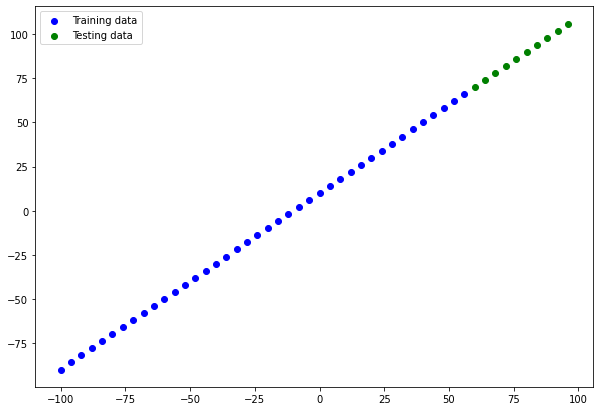

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

**Bulding model**

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [Functional](https://www.tensorflow.org/guide/keras/functional) or [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer). 
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`). 

Let's see these in action using the [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to build a model for our regression data. And then we'll step through each.

> **Note:** If you're using [TensorFlow 2.7.0](https://github.com/tensorflow/tensorflow/releases/tag/v2.7.0)+, the `fit()` function no longer upscales input data to go from `(batch_size, )` to `(batch_size, 1)`. To fix this, you'll need to expand the dimension of input data using `tf.expand_dims(input_data, axis=-1)`.
>
> In our case, this means instead of using `model.fit(X, y, epochs=5)`, use `model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)`. 


In [ ]:
# Set random seed for reproducing purpuse
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])


# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Calling `summary()` on our model shows us the layers it contains, the output shape and the number of parameters.
* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

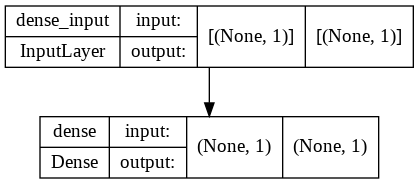

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

Alongside summary, you can also view a 2D plot of the model using [`plot_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model).

**Question:** What's Keras? I thought we were working with TensorFlow but every time we write TensorFlow code, `keras` comes after `tf` (e.g. `tf.keras.layers.Dense()`)?

Before TensorFlow 2.0+, [Keras](https://keras.io/) was an API designed to be able to build deep learning models with ease. Since TensorFlow 2.0+, its functionality has been tightly integrated within the TensorFlow library.

**Question:** What's Dense? 

Just your regular densely-connected NN layer. Here is definition if TF documentation ([tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense))



```
tf.keras.layers.Dense(
    units, activation=None, use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None,
    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
    bias_constraint=None, **kwargs
)
```

**Let's fit our model to data**




In [ ]:
# Fit model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 6ms/step - loss: 19.0311 - mae: 19.0311
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 10.8111 - mae: 10.8111
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 14.5005 - mae: 14.5005
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 10.0958 - mae: 10.0958
Epoch 5/100
2/2 [==============================] - 0s 15ms/step - loss: 15.5388 - mae: 15.5388
Epoch 6/100
2/2 [==============================] - 0s 22ms/step - loss: 11.8626 - mae: 11.8626
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 9.1727 - mae: 9.1727
Epoch 8/100
2/2 [==============================] - 0s 13ms/step - loss: 13.6143 - mae: 13.6143
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 13.8577 - mae: 13.8577
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 9.9966 - mae: 9.9966
Epoch 11/100
2/2 [==============================] - 0s 12m

We started with 19.0311 loss in first epochs and ends with 14.9030! Not that much improvement! 


**Evaluating model**


A typical workflow you'll go through when building neural networks is:

```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

In [ ]:
# Make predictions
y_preds = model.predict(X_test)

**Function for plotting**

In [ ]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

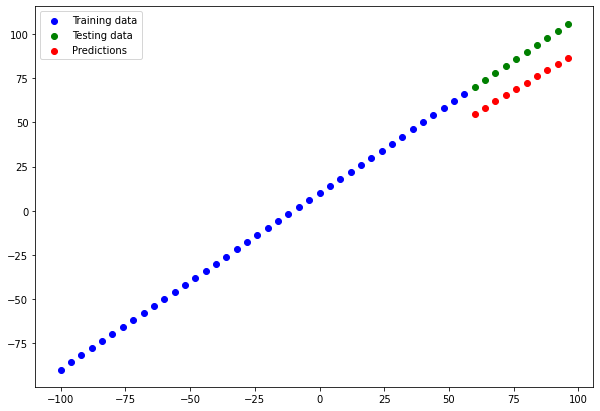

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

Very poor model! We can now add neurons and layers to make a more sophisticated model!

Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics. 

Two of the main metrics used for regression problems are:
* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

The lower each of these values, the better.

You can also use [`model.evaluate()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate) which will return the loss of the model as well as any metrics setup during the compile step.

In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 140ms/step - loss: 17.2724 - mae: 17.2724


[17.272384643554688, 17.272384643554688]

In our case, since we used MAE for the loss function as well as MAE for the metrics, `model.evaulate()` returns them both.

TensorFlow also has built in functions for MSE and MAE.

For many evaluation functions, the premise is the same: compare predictions to the ground truth labels.

**We can create function to calculate MAE and MSE:**

In [ ]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

In [ ]:
mae(y_test, y_preds), mse(y_test, y_preds)

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([33.228466, 29.682673, 26.136875, 22.59108 , 19.045288, 15.999591,
        13.572214, 11.763159, 10.57242 , 10.      ], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([1236.131  , 1013.0609 ,  815.1362 ,  642.3569 ,  494.72305,
         372.23416,  274.8907 ,  202.69275,  155.64   ,  133.73264],
       dtype=float32)>)

That's strange, MAE should be a single output.

Instead, we get 10 values!

This is because our `y_test` and `y_preds` tensors are different shapes.

In [ ]:
# Check the tensor shapes
y_test.shape, y_preds.shape

((10,), (10, 1))

We can fix it using [`squeeze()`](https://www.tensorflow.org/api_docs/python/tf/squeeze), it'll remove the the `1` dimension from our `y_preds` tensor, making it the same shape as `y_test`.

In [ ]:
# Check the tensor shapes
y_test.shape, y_preds.squeeze().shape

((10,), (10,))

In [ ]:
mae(y_test, y_preds.squeeze()), mse(y_test, y_preds.squeeze())

(<tf.Tensor: shape=(), dtype=float32, numpy=17.272385>,
 <tf.Tensor: shape=(), dtype=float32, numpy=300.0373>)

MAE is 17.27 and MSE is 300.03 for test dataset.

**Plotting loss vs epochs**

- Before trying to improve model, let's learn how to plot loss vs epochs
- To do this, we need to assign model.fit to a variable such as `history`



In [ ]:
history = model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose = 0) # verbose = 0 means do not show iterations

Evaluation of `history`:

In [ ]:
history.history.keys()

dict_keys(['loss', 'mae'])

So we can plot both loss and metrics we defined in `compile` using `history`

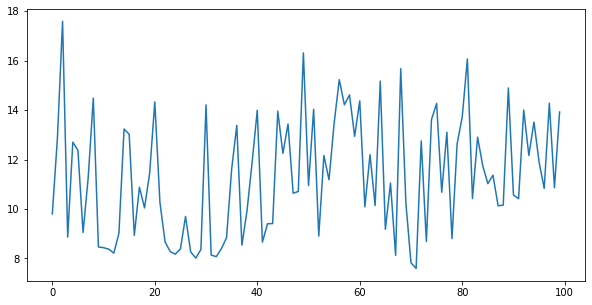

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])

#### Running experiments to improve a model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:
1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:
1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**

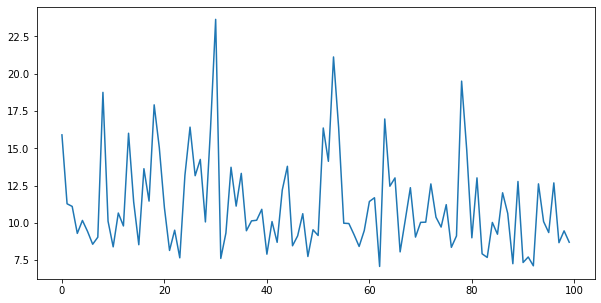

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
history_1 = model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose = 0)


plt.figure(figsize=(10,5))
plt.plot(history_1.history['loss'])

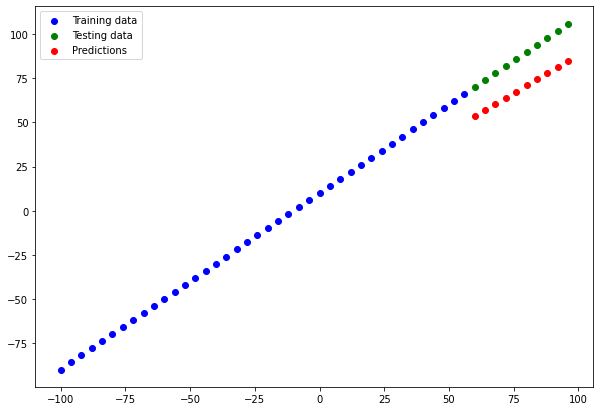

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(18.745327, 353.57336)

**Build `model_2`**

This time we'll add an extra dense layer (so now our model will have 2 layers) whilst keeping everything else the same.

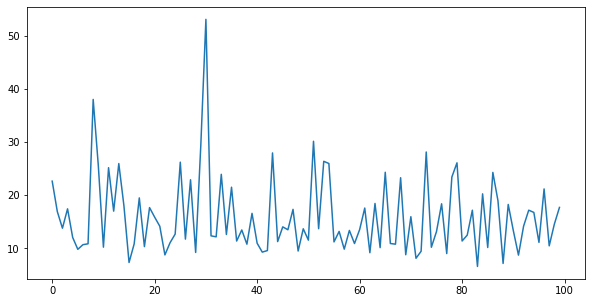

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), 
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
history_2 = model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose = 0)


plt.figure(figsize=(10,5))
plt.plot(history_2.history['loss'])

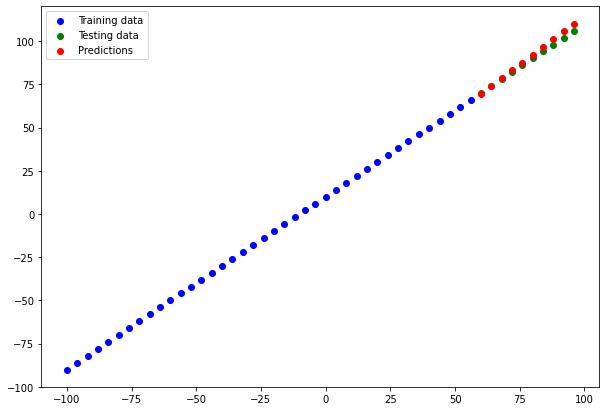

In [ ]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(1.9098114, 5.459232)

**Build `model_3`**

For our 3rd model, we'll keep everything the same as `model_2` except this time we'll train for longer (500 epochs instead of 100).

This will give our model more of a chance to learn the patterns in the data.

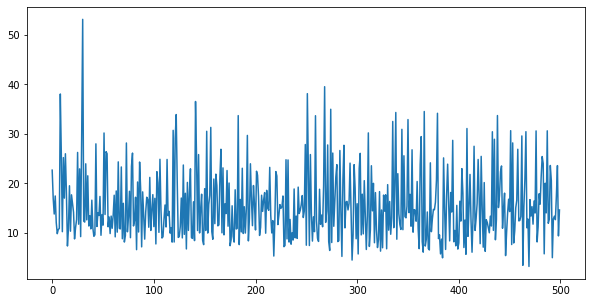

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), 
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
history_3 = model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose = 0)


plt.figure(figsize=(10,5))
plt.plot(history_3.history['loss'])

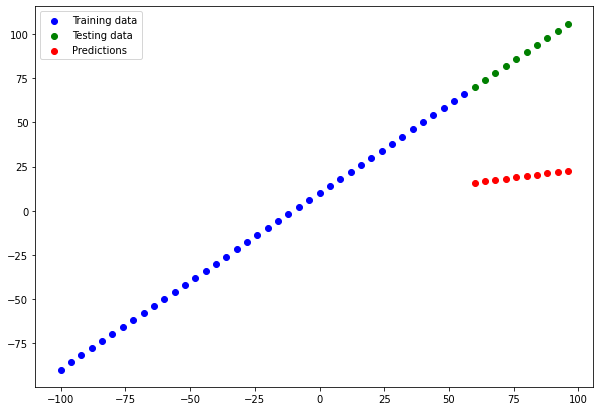

In [ ]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(68.68786, 4804.4717)

#### Comparing results

Now we've got results for 3 similar but slightly different results, let's compare them.

In [ ]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

In [ ]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,1.909811,5.459232
2,model_3,68.687859,68.687859


From our experiments, it looks like `model_2` performed the best.

And now, you might be thinking, "wow, comparing models is tedious..." and it definitely can be, we've only compared 3 models here. 

But this is part of what machine learning modelling is about, trying many different combinations of models and seeing which performs best.

Each model you build is a small experiment. 

#### Saving a model

Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [ ]:
# Save a model using the SavedModel format
model_2.save('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [ ]:
# Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls best_model_SavedModel_format

assets	keras_metadata.pb  saved_model.pb  variables


Now let's save the model in the HDF5 format, we'll use the same method but with a different filename.

In [ ]:
# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

In [ ]:
# Check it out
!ls best_model_HDF5_format.h5

best_model_HDF5_format.h5


#### Loading a model

We can load a saved model using the [`load_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model) method.

Loading a model for the different formats (SavedModel and HDF5) is the same (as long as the pathnames to the particuluar formats are correct).

In [ ]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


Now let's test it out:

In [ ]:
# Compare model_2 with the SavedModel version (should return True)
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)


In [ ]:
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

True

Loading in from the HDF5 is much the same.

In [ ]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 with the loaded HDF5 version (should return True)
h5_model_preds = loaded_h5_model.predict(X_test)

In [ ]:
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

True

#### Downloading a model (from Google Colab)

Say you wanted to get your model from Google Colab to your local machine, you can do one of the following things:
* Right click on the file in the files pane and click 'download'.
* Use the code below.

In [ ]:
# Download the model (or any file) from Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Diesel NOx model prediction

#### Importing data

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/arminnorouzi/CSME2022_workshops/main/L00_data/Engine_NOx_classification.csv')
data.head()

,Load [ft.lb],Engine speed [rpm],mf [mg/stroke],Pr [PSI],NOx [ppm],High NOx
0,50,2502.400000,31.222326,15285.16744,103.899724,0
1,50,2248.666667,30.116667,15155.13333,112.610181,0
2,75,2502.000000,38.300000,15356.00000,114.789893,0
3,100,2504.000000,42.900000,15296.00000,125.411970,0
4,75,2262.000000,34.100000,15254.00000,126.524679,0


In [ ]:
cdf = data[['Load [ft.lb]','Engine speed [rpm]','mf [mg/stroke]','Pr [PSI]', 'NOx [ppm]']]

msk = np.random.rand(len(data)) < 0.8
train = cdf[msk]
test = cdf[~msk]

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


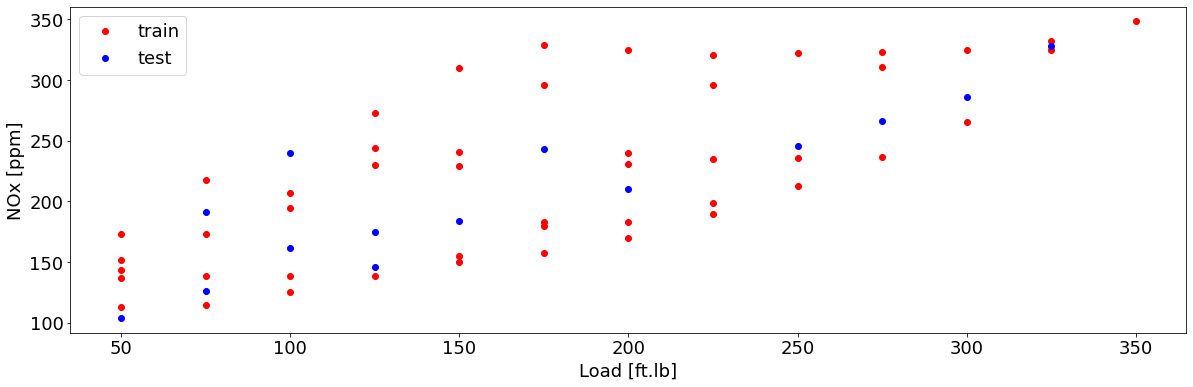

In [ ]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

plt.figure(1, figsize=(20, 6))
plt.plot(train['Load [ft.lb]'], train['NOx [ppm]'], 'or', label = 'train')
plt.plot(test['Load [ft.lb]'], test['NOx [ppm]'], 'ob', label = 'test')
plt.xlabel('Load [ft.lb]', fontsize=18)
plt.ylabel('NOx [ppm]', fontsize=18)
plt.legend(fontsize=18)

**Train/test set**

In [ ]:
from sklearn import preprocessing

x_train = np.asanyarray(train[['Load [ft.lb]','Engine speed [rpm]','mf [mg/stroke]','Pr [PSI]']])

x_test = np.asanyarray(test[['Load [ft.lb]','Engine speed [rpm]','mf [mg/stroke]','Pr [PSI]']])

# train_x = np.asanyarray(train[['Load [ft.lb]','Engine speed [rpm]']])
y_train = np.asanyarray(train[['NOx [ppm]']])

# test_x = np.asanyarray(test[['Load [ft.lb]','Engine speed [rpm]']])
y_test = np.asanyarray(test[['NOx [ppm]']])


min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(x_train)
X_test_minmax = min_max_scaler.transform(x_test)

**Define model:** Here similar model with one hidden layer with 15 neuron will be used as a first try 

Model: "My_NN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 1)                 5         
                                                                 
 Hidden_layer_1 (Dense)      (None, 15)                30        
                                                                 
 Output_layer (Dense)        (None, 1)                 16        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


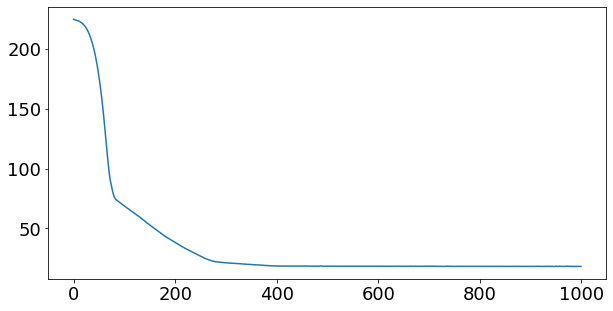

In [ ]:
# 1. Create model using the sequential API

NOx_model = tf.keras.Sequential([
                      tf.keras.layers.Dense(1, input_shape = [4], name ="Input_layer"),
                      tf.keras.layers.Dense(15, activation="relu", name ="Hidden_layer_1"),
                      tf.keras.layers.Dense(1, name = "Output_layer")
                      ], name = "My_NN_model")

# 2. Compile model

NOx_model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), #here Adam optimizer is used
              metrics = ["mae"])

NOx_model.summary()

history = NOx_model.fit(X_train_minmax,y_train, epochs = 1000,verbose = 0)

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])

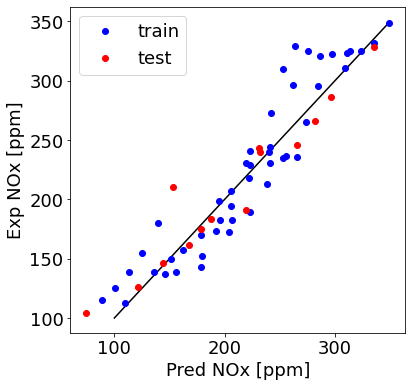

In [ ]:
train_y_hat = NOx_model.predict(X_train_minmax)
test_y_hat = NOx_model.predict(X_test_minmax)

plt.figure(1, figsize=(6, 6))
plt.plot([100,350], [100, 350],  '-k')
plt.plot(train_y_hat, train['NOx [ppm]'], 'ob', label = 'train')
plt.plot(test_y_hat, test['NOx [ppm]'], 'or', label = 'test')
plt.ylabel("Exp NOx [ppm]", fontsize=18)
plt.xlabel("Pred NOx [ppm]", fontsize=18)
plt.legend(fontsize=18)

#### Improving the mode

1. adding more layer

Model: "My_NN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 1)                 5         
                                                                 
 Hidden_layer_1 (Dense)      (None, 15)                30        
                                                                 
 Hidden_layer_2 (Dense)      (None, 15)                240       
                                                                 
 Output_layer (Dense)        (None, 1)                 16        
                                                                 
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


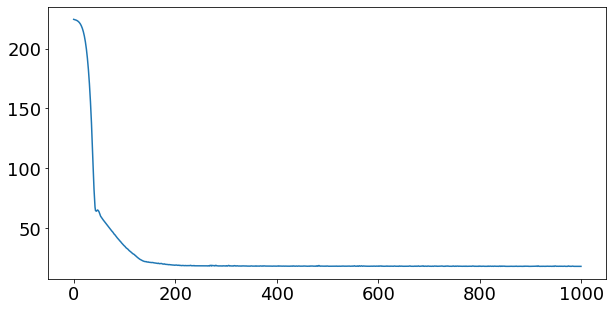

In [ ]:
# 1. Create model using the sequential API

NOx_model = tf.keras.Sequential([
                      tf.keras.layers.Dense(1, input_shape = [4], name ="Input_layer"),
                      tf.keras.layers.Dense(15, activation="relu", name ="Hidden_layer_1"),
                      tf.keras.layers.Dense(15, activation="relu", name ="Hidden_layer_2"),
                      tf.keras.layers.Dense(1, name = "Output_layer")
                      ], name = "My_NN_model")

# 2. Compile model

NOx_model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), #here Adam optimizer is used
              metrics = ["mae"])

NOx_model.summary()

history = NOx_model.fit(X_train_minmax,y_train, epochs = 1000,verbose = 0)

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])


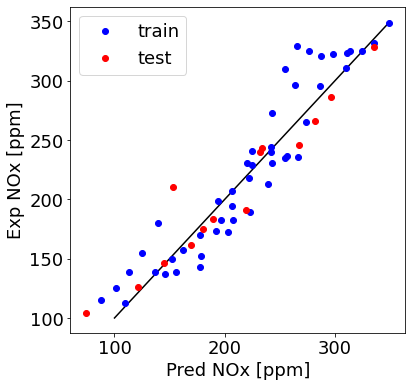

In [ ]:
train_y_hat = NOx_model.predict(X_train_minmax)
test_y_hat = NOx_model.predict(X_test_minmax)


plt.figure(1, figsize=(6, 6))
plt.plot([100,350], [100, 350],  '-k')
plt.plot(train_y_hat, train['NOx [ppm]'], 'ob', label = 'train')
plt.plot(test_y_hat, test['NOx [ppm]'], 'or', label = 'test')
plt.ylabel("Exp NOx [ppm]", fontsize=18)
plt.xlabel("Pred NOx [ppm]", fontsize=18)
plt.legend(fontsize=18)

- This is a good model! Can we add regularization in tensorflow

- Regularizers allow you to apply penalties on layer parameters or layer activity during optimization. These penalties are summed into the loss function that the network optimizes.

Regularization penalties are applied on a per-layer basis. The exact API will depend on the layer, but many layers (e.g. Dense, Conv1D, Conv2D and Conv3D) have a unified API.

These layers expose 3 keyword arguments:

1. `kernel_regularizer`: Regularizer to apply a penalty on the layer's kernel

1. `bias_regularizer`: Regularizer to apply a penalty on the layer's bias

2. `activity_regularizer`: Regularizer to apply a penalty on the layer's output


All layers (including custom layers) expose `activity_regularizer` as a settable property, whether or not it is in the constructor arguments.

The value returned by the `activity_regularizer` is divided by the input batch size so that the relative weighting between the weight regularizers and the activity regularizers does not change with the batch size.

You can access a layer's regularization penalties by calling layer.losses after calling the layer on inputs.

**Available penalties**


```
tf.keras.regularizers.L1(0.3)  # L1 Regularization Penalty
tf.keras.regularizers.L2(0.1)  # L2 Regularization Penalty
tf.keras.regularizers.L1L2(l1=0.01, l2=0.01)  # L1 + L2 penalties
```



As we add regularization, we can increase layer size with less chance of overfitting:

Model: "My_NN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 1)                 5         
                                                                 
 Hidden_layer_1 (Dense)      (None, 45)                90        
                                                                 
 Hidden_layer_2 (Dense)      (None, 15)                690       
                                                                 
 Output_layer (Dense)        (None, 1)                 16        
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


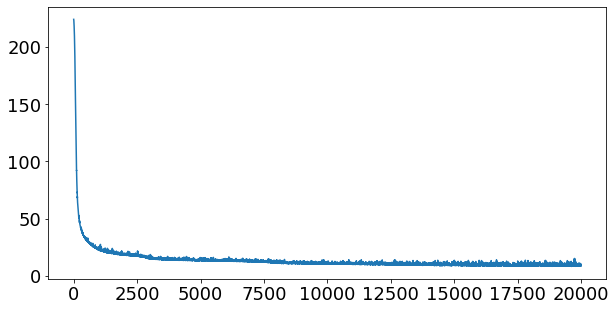

In [ ]:
# 1. Create model using the sequential API

NOx_model = tf.keras.Sequential([
                      tf.keras.layers.Dense(1, input_shape = [4], name ="Input_layer"),
                      tf.keras.layers.Dense(45, activation="relu", name ="Hidden_layer_1", activity_regularizer=tf.keras.regularizers.L2(0.1)), # L2 regularization is added
                      tf.keras.layers.Dense(15, activation="relu", name ="Hidden_layer_2", activity_regularizer=tf.keras.regularizers.L2(0.1)),
                      tf.keras.layers.Dense(1, name = "Output_layer")
                      ], name = "My_NN_model")

# 2. Compile model

NOx_model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), #here Adam optimizer is used
              metrics = ["mae"])

NOx_model.summary()

history = NOx_model.fit(X_train_minmax,y_train, epochs = 20000,verbose = 0)

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])


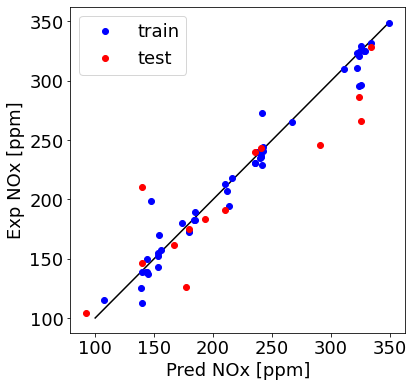

In [ ]:
train_y_hat = NOx_model.predict(X_train_minmax)
test_y_hat = NOx_model.predict(X_test_minmax)


plt.figure(1, figsize=(6, 6))
plt.plot([100,350], [100, 350],  '-k')
plt.plot(train_y_hat, train['NOx [ppm]'], 'ob', label = 'train')
plt.plot(test_y_hat, test['NOx [ppm]'], 'or', label = 'test')
plt.ylabel("Exp NOx [ppm]", fontsize=18)
plt.xlabel("Pred NOx [ppm]", fontsize=18)
plt.legend(fontsize=18)

## Dynamics model using DNN:


In [ ]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/arminnorouzi/CSME2022_workshops/main/L00_data/Transient_data.csv') # You need to edit this directory
data.head()

,time,SOI,FQ,Load
0,0.00,-3.8,24.6,0.001000
1,0.08,-3.8,24.6,123.612898
2,0.16,-3.8,24.6,154.786556
3,0.24,-3.8,24.6,155.228298
4,0.32,-3.8,24.6,155.283862


This is a transient data, so we can plot it over time or over each engine cycle (0.08 second)

Text(0, 0.5, 'Load [N.m]')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


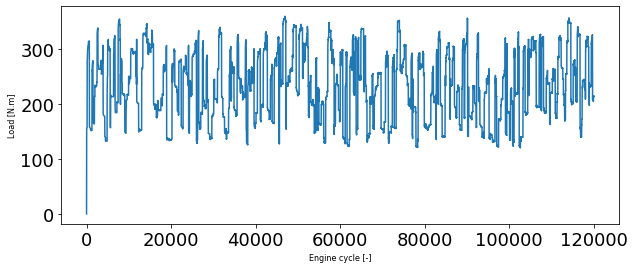

In [ ]:
area = 300
# area = 200
plt.figure(1, figsize=(10, 4))
plt.plot(data['Load'])

plt.xlabel('Engine cycle [-]', fontsize=8)
plt.ylabel('Load [N.m]', fontsize=8)

In [ ]:
X = np.asanyarray(data[['SOI','FQ']])
Y = np.asanyarray(data[['Load']])
len(X)

120001

In [ ]:
# Split data into train and test sets


X_train = X[:90000] # first 90000 cycles (75% of data)
y_train = Y[:90000]

X_test = X[90000:] # last 30000 cycles (25% of data)
y_test = Y[90000:]

len(X_train), len(X_test)

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)

In [ ]:
min_max_scaler.data_max_

array([ 2. , 59.7])

In [ ]:
min_max_scaler.data_min_

array([-9.9, 20. ])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                96        
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 Output_Layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 1.0, 'loss')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


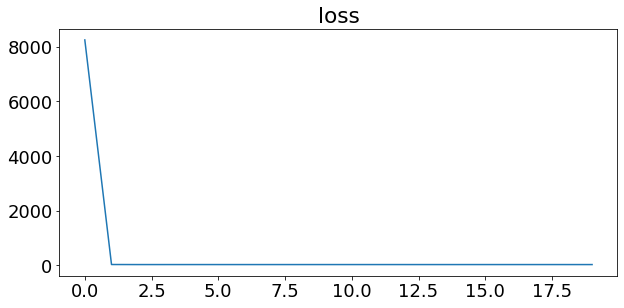

In [ ]:
# Let's try with sigmoid activation function

# Set random seed
tf.random.set_seed(42)

# Create a model
model_load = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape = (X_train_minmax.shape[1], )),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(1, name ="Output_Layer")
])

# Compile the model
model_load.compile(loss=tf.keras.losses.mse, # here we used MSE because MAE is not supported by Matlab
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['mse'])



# Fit the model
history = model_load.fit(X_train_minmax, y_train, epochs=20, verbose=0)

model_load.summary()


plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'])
plt.title("loss")





In [ ]:
X_train_minmax.shape, y_train.shape

((90000, 2), (90000, 1))

Text(0, 0.5, 'Load [N.m]')

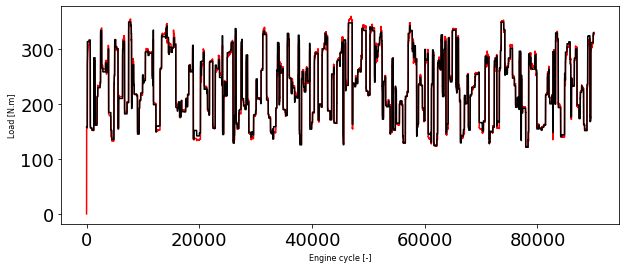

In [ ]:
y_train_hat = model_load.predict(X_train_minmax)

plt.figure(1, figsize=(10, 4))
plt.plot(y_train, 'r')
plt.plot(y_train_hat, 'k')

plt.xlabel('Engine cycle [-]', fontsize=8)
plt.ylabel('Load [N.m]', fontsize=8)

Text(0, 0.5, 'Load [N.m]')

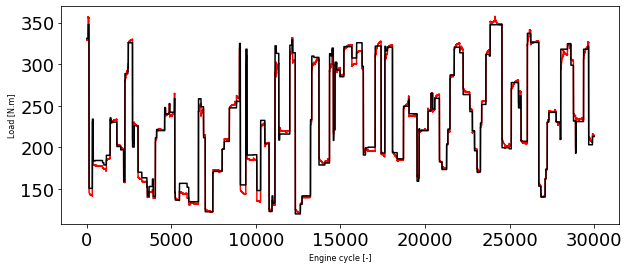

In [ ]:
y_test_hat = model_load.predict(X_test_minmax)

plt.figure(1, figsize=(10, 4))
plt.plot(y_test, 'r')
plt.plot(y_test_hat, 'k')

plt.xlabel('Engine cycle [-]', fontsize=8)
plt.ylabel('Load [N.m]', fontsize=8)

Save this model for later MPC implementation demo

In [ ]:
# Save a model using the HDF5 format
model_load.save("DNNmodel_MPC.h5") # note the addition of '.h5' on the end

## Recurent Neural Network with TensorFlow

### RNN Background 

**The Recurrent Neural Network (RNN)**

-   is structured similar to a feedforward ANN
-   but has backward connections that are used to handle sequential inputs



**Simple RNN input output**

-   The simplest RNN for time step $t$ is shown in the Figure
-   This recurrent neuron receives both inputs $u(t)$ and output from the previous time step, $y(t-1)$.
-   The output of the first step is generally initialized as zero.
-   The structure of RNN can be revealed by unrolling it in time, as shown in Figure (right)
-   The output of the recurrent neuron at the current time step $t$ is a function of past inputs, so a recurrent neuron can be considered a memory.




**Simple RNN state and output**

-   Generally, a cell's state at time step $t$ is given by $h_{(t)}$ ,
-   where \`\`$h$'' stands for \`\`hidden'' Cells states are a function of past states and past inputs: $h_{(t)} = f(h_{(t-1)}, u_{(t)})$.
-   The output of the network at time step $y(t)$ is a function of
    -   the past state,
    -   and the current inputs \cite{geron2019hands}.
-   For the case shown in Figure, the output of the recurrent layer is equal to the state.

$$h_t = \phi(W_u^T u_t + w_h h_{t-1} + b_y)$$
$$\hat{y}(t) = \phi(W_y^T h_t + b_y)$$

-   where $h_t$ is hidden state (memory cell) of RNN,
-   $W_u$, $W_h$, and $W_y$ are input, hidden state, and output weights,
-   $b_h$ and $b_y$ are hidden state and output bias values, respectively.

-   The main reasons that an RNN is computationally efficient is due to:
    -   parameter sharing
    -   network weights ($W_u$, $W_h$, and $W_y$) that are constant for the different time steps.



**Long Short-Term Memory (LSTM)**

-   when LSTM is compared to RNN, in LSTM the hidden state is split into two main part:
    -   $h_{(t)}$ the short-term state, and
    -   $c_{(t)}$ the long-term state.
-   As shown in Figure, the long-term state $c_{(t-1)}$ traverses the network from left to right.
    1.  this state first enters the forget gate where past values are dropped
    2.  then some values (memories) are added to the input gate to get $c_{t}$
    3.  so at each time step, some memory is added, and some are dropped, and
    4.  the current long-term state $c_{(t)}$ is output without further change.

![](https://github.com/arminnorouzi/ML-developed_course/blob/main/L04_DL/figures/LSTMCell.PNG?raw=true)


-   Further, after adding new memory, the long-term state is
    -   replicated,
    -   passed into the $\tanh$ function, and
    -   the output gate filters the result to generate the short-term state $h_{(t)}$ (equals to the cell's output $y_{(t)}$ for this time step) \cite{geron2019hands}.
-   LTSM computations are summarized here

$$\begin{split}
        i{(t)} &= \sigma(W_{ui}^Tu(t) + W_{hi}^T h{(t-1)} + b_i) \\
        f{(t)} &= \sigma(W_{uf}^Tu(t) + W_{hf}^T h{(t-1)} + b_f) \\
        o{(t)} &= \sigma(W_{uo}^Tu(t) + W_{ho}^T h{(t-1)} + b_o) \\
        g{(t)} &=  \tanh(W_{ug}^Tu(t) + W_{hg}^T h{(t-1)} + b_g) \\
        c{(t)} &=  f{(t)} \odot c{(t-1)} + i{(t)} \odot g{(t)} \\
        y{(t)} &= h{(t)} = o{(t)} \odot \tanh(c_{(t)})\\
    \end{split}$$ 

-   where $W_{u(f,g,i,o)}$ and $W_{h(f,g,i,o)}$ are the weight matrices of each four layer for their connection to input vector $u_{(t)}$ and then
-   the previous short-term state $h_{(t)}$
-   In this equation, $\odot$, is element-wise multiplication
-   $b_{(f,g,i,o)}$ are the bias terms for each four layer.
-   all four networks $i{(t)}$, $f{(t)}$, $o{(t)}$, and $g{(t)}$ are fully connected (FC) layer;
-   so each layer of LSTM has four FC layer weights and biases.



To train an RNN, the technique of unrolling it through time

-   then simply use regular backpropagation.
-   This strategy is called backpropagation through time (BPTT).



Recurrent neural networks (RNN) are a class of neural networks that is powerful for modeling sequence data such as time series or natural language.

Schematically, a RNN layer uses a for loop to iterate over the timesteps of a sequence, while maintaining an internal state that encodes information about the timesteps it has seen so far.

The Keras RNN API is designed with a focus on:

- **Ease of use**: the built-in `keras.layers.RNN`, `keras.layers.LSTM`, `keras.layers.GRU` layers enable you to quickly build recurrent models without having to make difficult configuration choices.

- **Ease of customization**: You can also define your own RNN cell layer (the inner part of the for loop) with custom behavior, and use it with the generic `keras.layers.RNN` layer (the for loop itself). This allows you to quickly prototype different research ideas in a flexible way with minimal code.

### Dynamics modeling using LSTM layer

As you might've guessed, we can also use a recurrent neural network to model our sequential time series data.

**Resource:** For more on the different types of recurrent neural networks you can use for sequence problems, see the [Recurrent Neural Networks section of notebook 08](https://dev.mrdbourke.com/tensorflow-deep-learning/08_introduction_to_nlp_in_tensorflow/#recurrent-neural-networks-rnns).


one of the most important steps for the LSTM model will be getting our data into the right shape.

The [`tf.keras.layers.LSTM()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) layer takes a tensor with `[batch, timesteps, feature]` dimensions.

The `batch` dimension gets taken care of for us but our data is currently only has the `feature` dimension.

To fix this, we can use a `tf.keras.layers.Lambda()` layer to adjust the shape of our input tensors to the LSTM layer.








Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 lambda (Lambda)             (None, 1, 2)              0         
                                                                 
 lstm (LSTM)                 (None, 128)               67072     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 67,201
Trainable params: 67,201
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 1.0, 'loss')

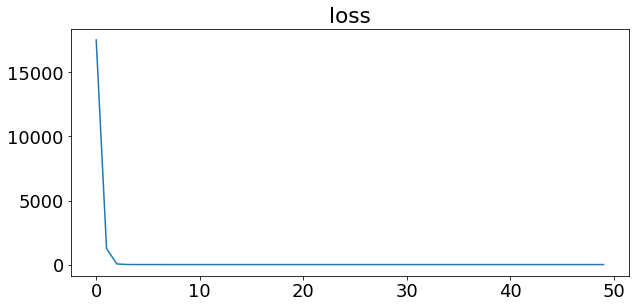

In [ ]:
from tensorflow.keras import layers

tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(2))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
x = layers.LSTM(128, activation='tanh', recurrent_activation='sigmoid', use_bias=True)(x) 
output = layers.Dense(1)(x)
model_load_lstm = tf.keras.Model(inputs=inputs, outputs=output)

# Compile model
model_load_lstm.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['mse'])

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554 
history = model_load_lstm.fit(X_train_minmax, y_train, epochs=50, verbose=0)

model_load_lstm.summary()


plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'])
plt.title("loss")


Text(0, 0.5, 'Load [N.m]')

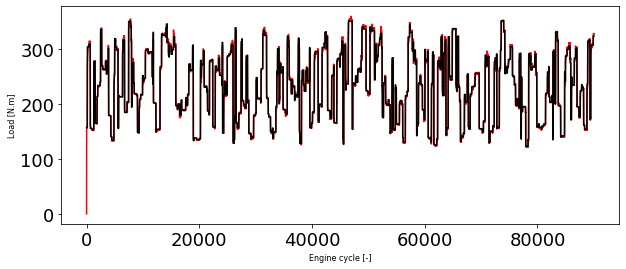

In [ ]:
y_train_hat = model_load_lstm.predict(X_train_minmax)

plt.figure(1, figsize=(10, 4))
plt.plot(y_train, 'r')
plt.plot(y_train_hat, 'k')

plt.xlabel('Engine cycle [-]', fontsize=8)
plt.ylabel('Load [N.m]', fontsize=8)

Text(0, 0.5, 'Load [N.m]')

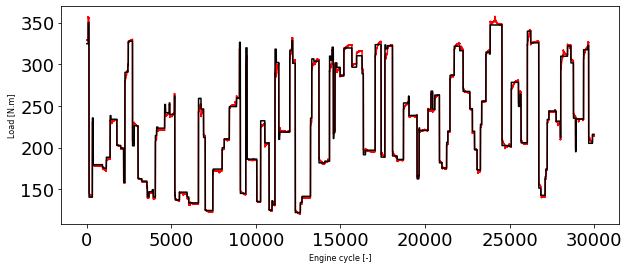

In [ ]:
y_test_hat = model_load_lstm.predict(X_test_minmax)

plt.figure(1, figsize=(10, 4))
plt.plot(y_test, 'r')
plt.plot(y_test_hat, 'k')

plt.xlabel('Engine cycle [-]', fontsize=8)
plt.ylabel('Load [N.m]', fontsize=8)

As you can see we have signifiantly better model using LSTM layers

In [ ]:
# Save a model using the HDF5 format
model_load_lstm.save("LSTMmodel_MPC.h5") # note the addition of '.h5' on the end

## Importing network in Matlab to design MPC controller

Import pretrained Keras network and weights



```
net = importKerasNetwork(modelfile)
net = importKerasNetwork(modelfile,Name,Value)
```



`net` = `importKerasNetwork(modelfile)` imports a pretrained TensorFlow-Keras network and its weights from modelfile.

This function requires the Deep Learning Toolbox™ Converter for TensorFlow Models support package. If this support package is not installed, the function provides a download link.

`net` = `importKerasNetwork(modelfile,Name,Value)` imports a pretrained TensorFlow-Keras network and its weights with additional options specified by one or more name-value pair arguments.

For example, importKerasNetwork(modelfile,'WeightFile',weights) imports the network from the model file modelfile and weights from the weight file weights. In this case, modelfile can be in HDF5 or JSON format, and the weight file must be in HDF5 format.

Check Mathwork documentation for more detail and workshop to how to use developed network in Matlab [importKerasNetwork](https://www.mathworks.com/help/deeplearning/ref/importkerasnetwork.html;jsessionid=4a554c9635666ea73eeee66f2712)



## Using Matlab Deep learning toolbox to develop deep learning model

**please refer to folder `RNN-LSTM-Matlab-example`**

Check Folder `RNN-LSTM-Matlab-example`

-   main file `loadModel.m`
    -   load data `ML_Data.mat` (110,000 long)
    -   normalize data using `dataTrainStandardized`
    -   separate training (100,000) and test (10,000)
    -   Create and Train Network
        -   number of outputs - we only trying to model load: `numResponses = 1;`
        -   number of inputs - mf and SOI: `featureDimension = 2;`
        -   number of hidden units (neurons): `numHiddenUnits1 = 26;`
        -   number of Epoch: `maxEpochs = 120;`
        -   size of minibatch: `miniBatchSize = 512;`
        -   and set using `Networklayers`
        -   set options using `options = trainingOptions`
        -   train using `trainNetwork`
    -   check the network configuration `analyzeNetwork`
    -   predict output `predict`



## Reference

[1] [Neural Network Regression with TensorFlow](https://dev.mrdbourke.com/tensorflow-deep-learning/01_neural_network_regression_in_tensorflow/)

[2] [Neural Network Classification with TensorFlow](https://dev.mrdbourke.com/tensorflow-deep-learning/02_neural_network_classification_in_tensorflow/)

[3] [Milestone Project 3: Time series forecasting in TensorFlow ](https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/)

[4] [Tensorflow Documentation for Python](https://www.tensorflow.org/)